#Step-by-Step Code for the CRISP-DM Process

In [306]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Business Understanding
# This dataset is used to understand customer churn behavior, aiming to identify factors that contribute to customer churn.

In [307]:
telco = pd.read_csv('/content/Telco_customer_churn.csv')

In [308]:
telco

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


# Data Understanding

In [309]:
telco.head(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [310]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [311]:
telco.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [312]:
telco.duplicated().sum()

0

In [313]:
telco.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,
0004-TLHLJ,1,United States,California,Costa Mesa,92627,"33.645672, -117.922613",33.645672,-117.922613,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,Yes,1,71,4479,Price too high,1
6410-LEFEN,1,United States,California,San Diego,92108,"32.774046, -117.142454",32.774046,-117.142454,Female,No,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,45.15,416.45,Yes,1,73,3757,Product dissatisfaction,1
6481-OGDOO,1,United States,California,San Diego,92129,"32.961064, -117.134917",32.961064,-117.134917,Male,No,Yes,No,67,Yes,No,Fiber optic,Yes,Yes,No,No,No,Yes,One year,Yes,Credit card (automatic),90.60,6056.15,Yes,1,73,4394,Product dissatisfaction,1
6474-FVJLC,1,United States,California,Sherman Oaks,91423,"34.146957, -118.432138",34.146957,-118.432138,Male,No,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,86.00,165.45,Yes,1,77,4546,Attitude of support person,1
6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276-HDUEG,1,United States,California,Maricopa,93252,"34.737031, -119.460557",34.737031,-119.460557,Female,No,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.05,75.05,Yes,1,78,4838,Competitor offered higher download speeds,1
3269-ATYWD,1,United States,California,San Francisco,94123,"37.800254, -122.436975",37.800254,-122.436975,Male,Yes,No,No,39,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.65,3759.05,Yes,1,65,4892,Don't know,1
3259-FDWOY,1,United States,California,Elk Grove,95758,"38.35363, -121.44195",38.353630,-121.441950,Male,No,Yes,No,71,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),106.00,7723.7,Yes,1,81,4072,Competitor offered higher download speeds,1


In [314]:
telco.dtypes

,0
CustomerID,object
Count,int64
Country,object
State,object
City,object
Zip Code,int64
Lat Long,object
Latitude,float64
Longitude,float64
Gender,object


In [315]:
telco.nunique()

,0
CustomerID,7043
Count,1
Country,1
State,1
City,1129
Zip Code,1652
Lat Long,1652
Latitude,1652
Longitude,1651
Gender,2


# Data Preparation and EDA
# Check for missing values

In [316]:
telco.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [317]:
# Check for null values in the dataset
null_values_summary = telco.isnull().sum()

# Remove rows with any null values
telco_cleaned = telco.dropna()

# Display the summary of null values and cleaned data information
null_values_summary, telco_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 0 to 1868
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1869 non-null   object 
 1   Count              1869 non-null   int64  
 2   Country            1869 non-null   object 
 3   State              1869 non-null   object 
 4   City               1869 non-null   object 
 5   Zip Code           1869 non-null   int64  
 6   Lat Long           1869 non-null   object 
 7   Latitude           1869 non-null   float64
 8   Longitude          1869 non-null   float64
 9   Gender             1869 non-null   object 
 10  Senior Citizen     1869 non-null   object 
 11  Partner            1869 non-null   object 
 12  Dependents         1869 non-null   object 
 13  Tenure Months      1869 non-null   int64  
 14  Phone Service      1869 non-null   object 
 15  Multiple Lines     1869 non-null   object 
 16  Internet Service   1869 non-n

(CustomerID              0
 Count                   0
 Country                 0
 State                   0
 City                    0
 Zip Code                0
 Lat Long                0
 Latitude                0
 Longitude               0
 Gender                  0
 Senior Citizen          0
 Partner                 0
 Dependents              0
 Tenure Months           0
 Phone Service           0
 Multiple Lines          0
 Internet Service        0
 Online Security         0
 Online Backup           0
 Device Protection       0
 Tech Support            0
 Streaming TV            0
 Streaming Movies        0
 Contract                0
 Paperless Billing       0
 Payment Method          0
 Monthly Charges         0
 Total Charges           0
 Churn Label             0
 Churn Value             0
 Churn Score             0
 CLTV                    0
 Churn Reason         5174
 dtype: int64,
 None)

# Convert categorical features to numeric using Label Encoding if necessary


In [318]:
label_enc = LabelEncoder()
for column in telco.select_dtypes(include='object').columns:
    telco[column] = label_enc.fit_transform(telco[column])

In [319]:
telco

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,2564,1,0,0,562,90003,327,33.964131,-118.272783,1,...,0,1,3,53.85,157,1,1,86,3239,3
1,6511,1,0,0,562,90005,405,34.059281,-118.307420,0,...,0,1,2,70.70,925,1,1,67,2701,13
2,6551,1,0,0,562,90006,393,34.048013,-118.293953,0,...,0,1,2,99.65,6104,1,1,86,5372,13
3,5604,1,0,0,562,90010,410,34.062125,-118.315709,0,...,0,1,2,104.80,2646,1,1,84,5003,13
4,174,1,0,0,562,90015,385,34.039224,-118.266293,1,...,0,1,0,103.70,4265,1,1,89,5340,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1758,1,0,0,521,92285,587,34.341737,-116.539416,0,...,2,1,0,21.15,770,0,0,45,5306,20
7039,4853,1,0,0,2,92301,636,34.667815,-117.536183,1,...,1,1,3,84.80,1597,0,0,59,2140,20
7040,1525,1,0,0,22,92304,625,34.559882,-115.637164,0,...,1,1,1,103.20,5698,0,0,71,5560,20
7041,3367,1,0,0,26,92305,512,34.167800,-116.864330,0,...,0,1,2,29.60,2994,0,0,59,2793,20


In [320]:
print(telco.columns)

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')


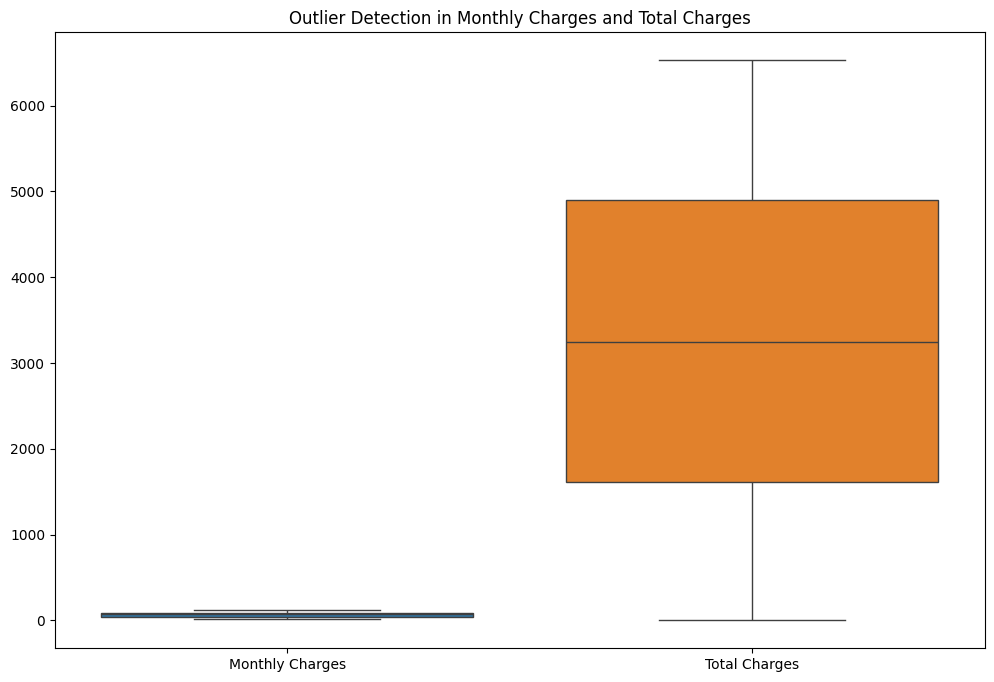

In [321]:
# Visualize outliers with box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=telco[['Monthly Charges', 'Total Charges']])
plt.title("Outlier Detection in Monthly Charges and Total Charges")
plt.show()

# Optional: Remove outliers (for demonstration, setting a threshold for MonthlyCharges)
telco = telco[(telco['Monthly Charges'] < telco['Monthly Charges'].quantile(0.99))]


In [322]:
# Creating TenureCategory based on tenure
telco['Tenure Category'] = pd.cut(telco['Tenure Months'], bins=[0, 12, 24, 48, 60, 72],
                              labels=['0-1 Year', '1-2 Years', '2-4 Years', '4-5 Years', '5-6 Years'])

<ipython-input-322-0fa4b10ce23e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco['Tenure Category'] = pd.cut(telco['Tenure Months'], bins=[0, 12, 24, 48, 60, 72],


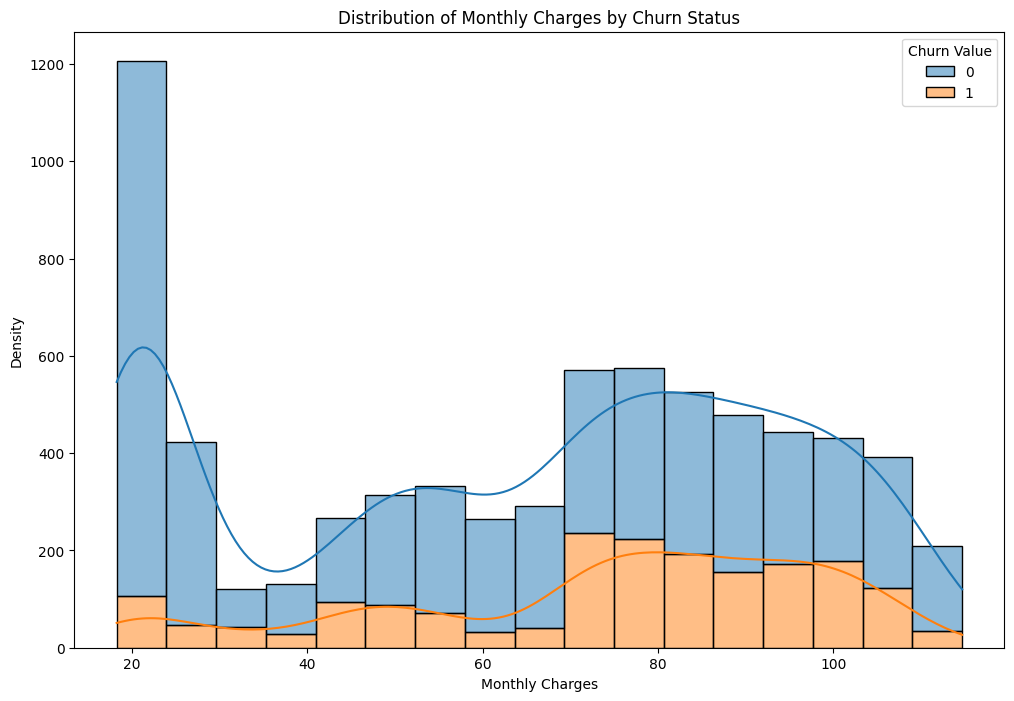

In [323]:
# Distribution of MonthlyCharges by Churn
plt.figure(figsize=(12, 8))
sns.histplot(telco, x='Monthly Charges', hue='Churn Value', multiple='stack', kde=True)
plt.title("Distribution of Monthly Charges by Churn Status")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.show()


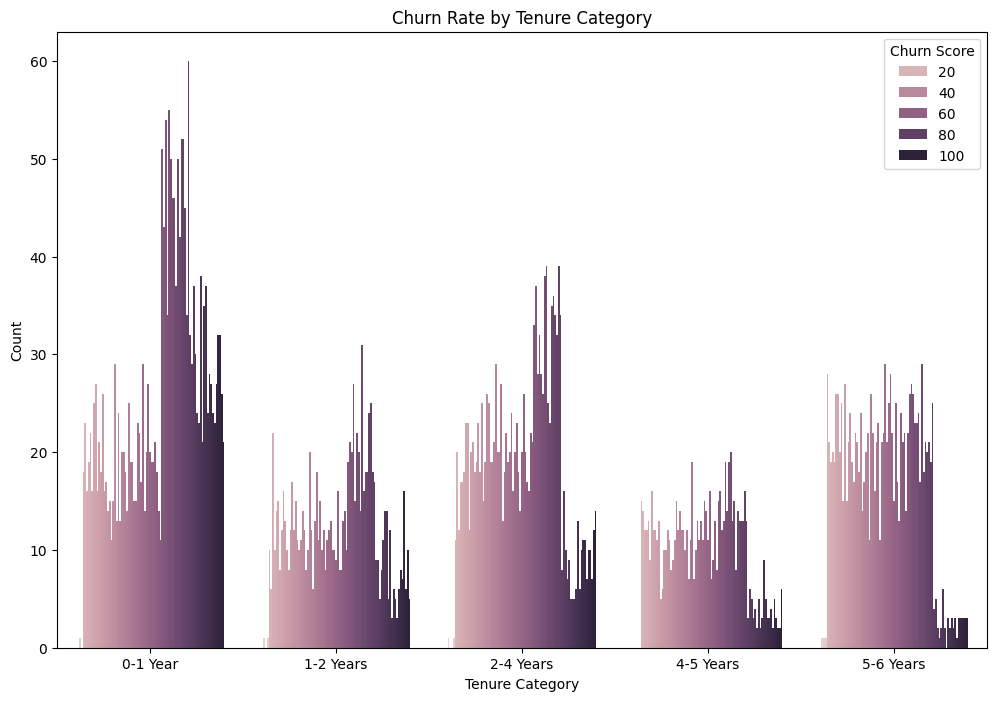

In [324]:
# Churn Rate by Tenure Category
plt.figure(figsize=(12, 8))
sns.countplot(data=telco, x='Tenure Category', hue='Churn Score')
plt.title("Churn Rate by Tenure Category")
plt.xlabel("Tenure Category")
plt.ylabel("Count")
plt.show()

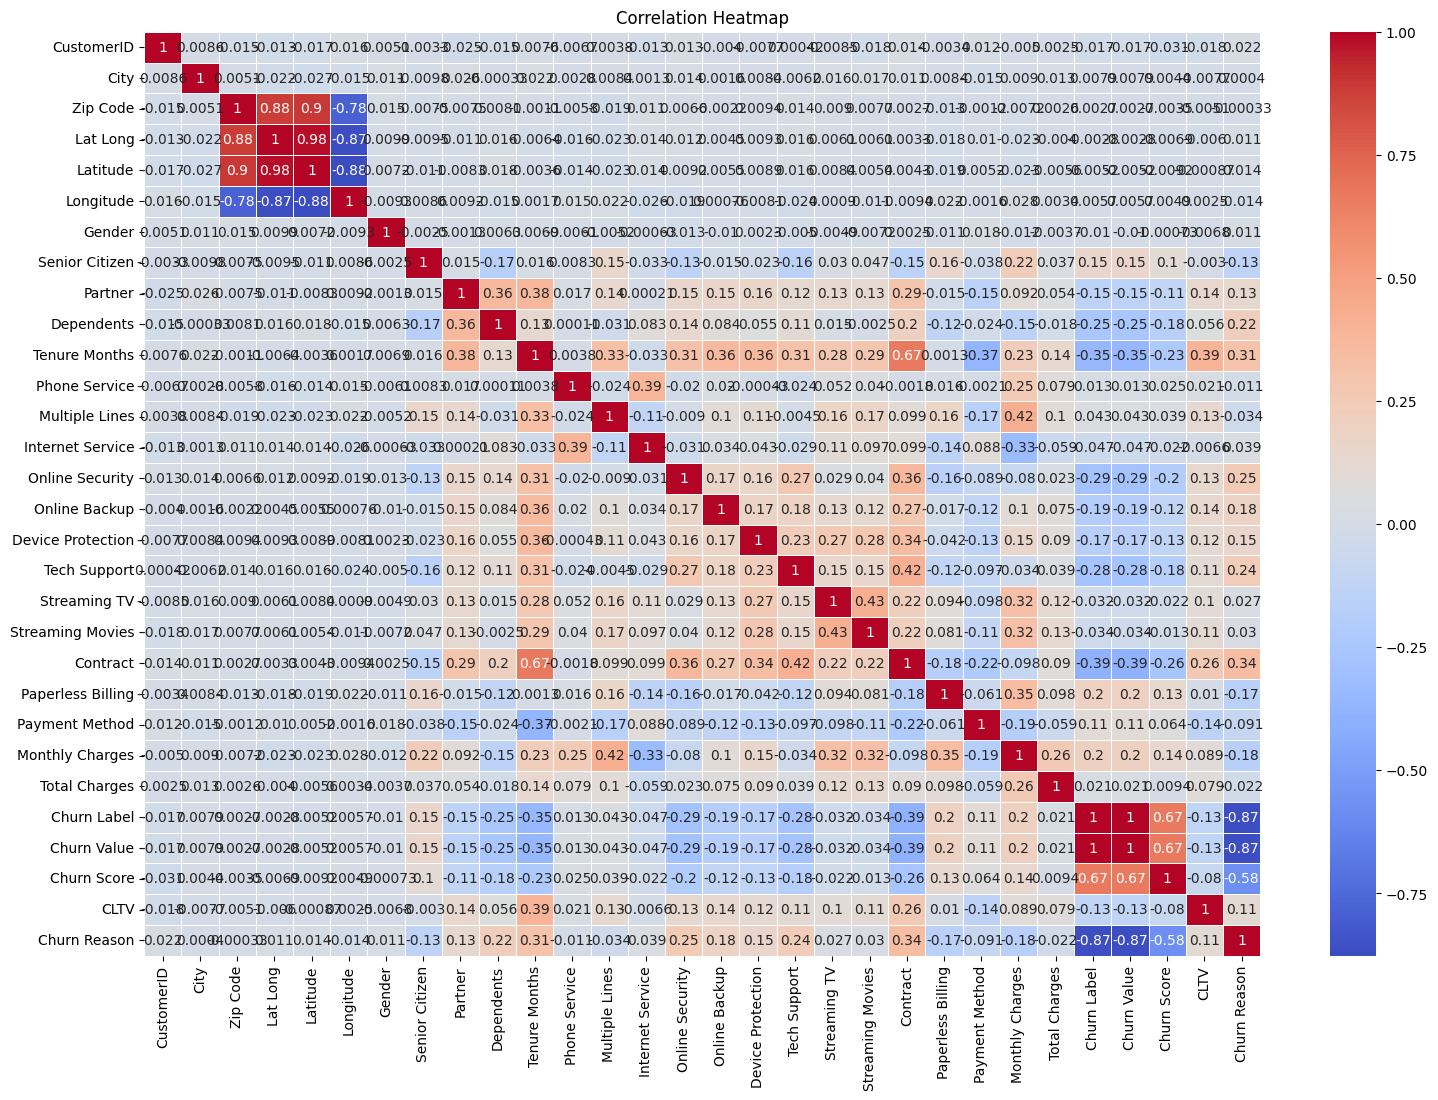

In [325]:
# correlation among numeric features, including the target variable.
# Select only numeric columns for correlation calculation
telco1 = telco.drop(columns=["Count", "Country", "State"], errors='ignore')
numeric_telco = telco1.select_dtypes(include=[np.number])

# Plot the correlation heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(numeric_telco.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


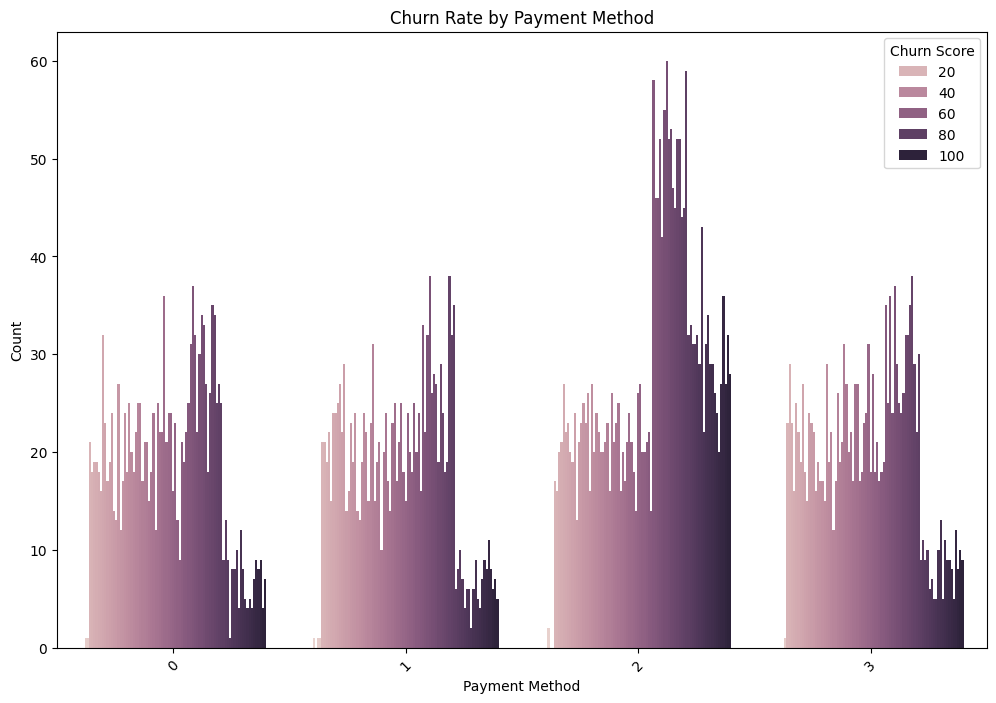

In [326]:
# Churn by Payment Method
plt.figure(figsize=(12, 8))
sns.countplot(data=telco, x='Payment Method', hue='Churn Score')
plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


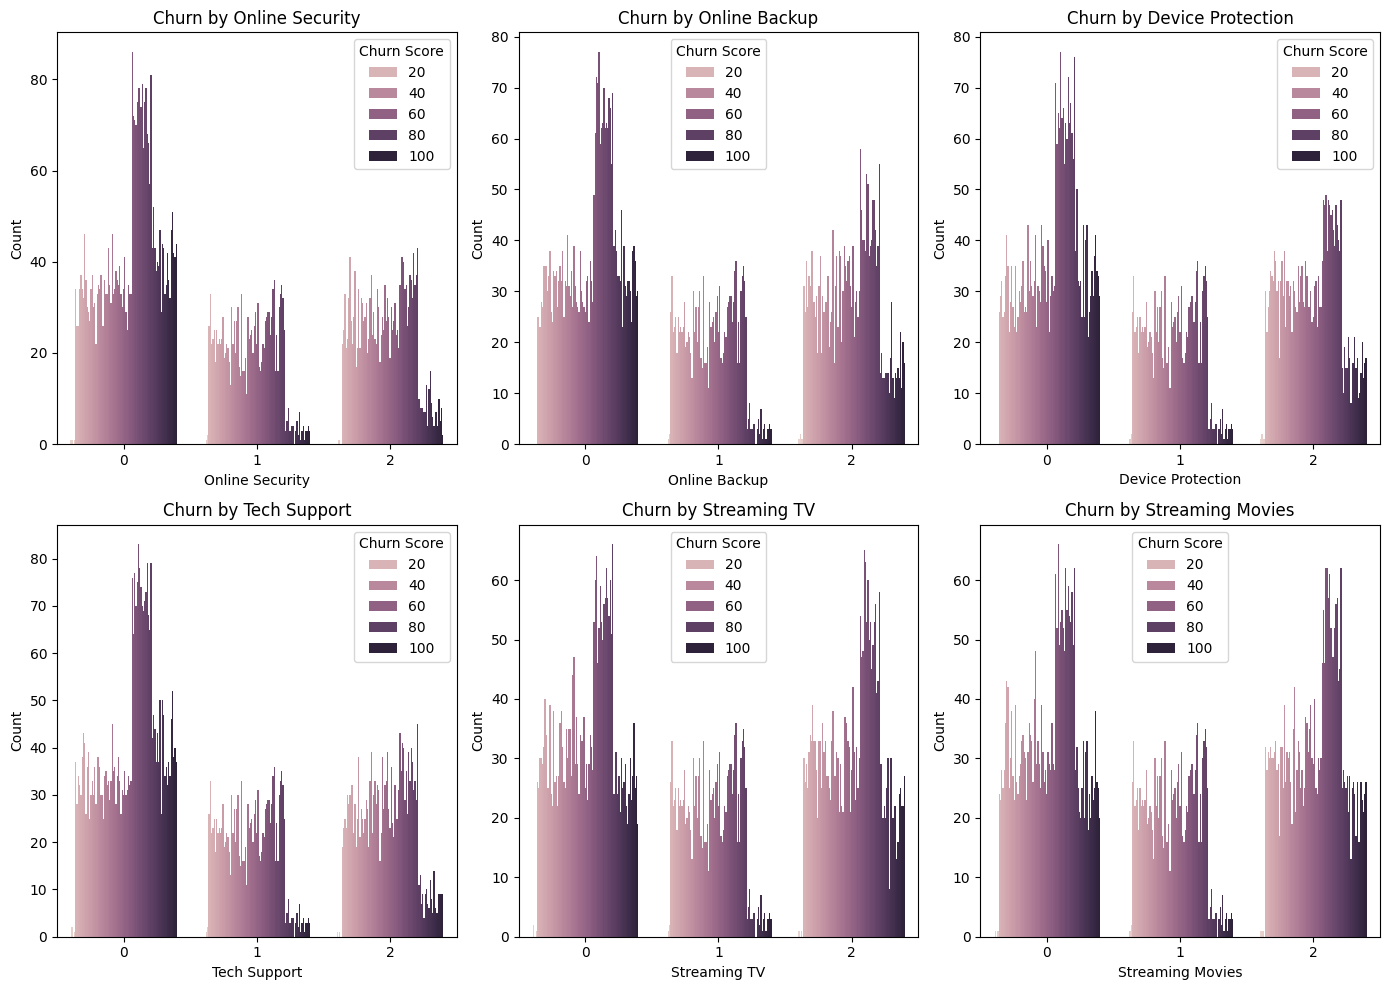

In [327]:
# churn rate for different services such as OnlineSecurity, TechSupport, and StreamingTV
services = ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']
plt.figure(figsize=(14, 10))

for i, service in enumerate(services, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=telco, x=service, hue='Churn Score')
    plt.title(f"Churn by {service}")
    plt.xlabel(service)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()


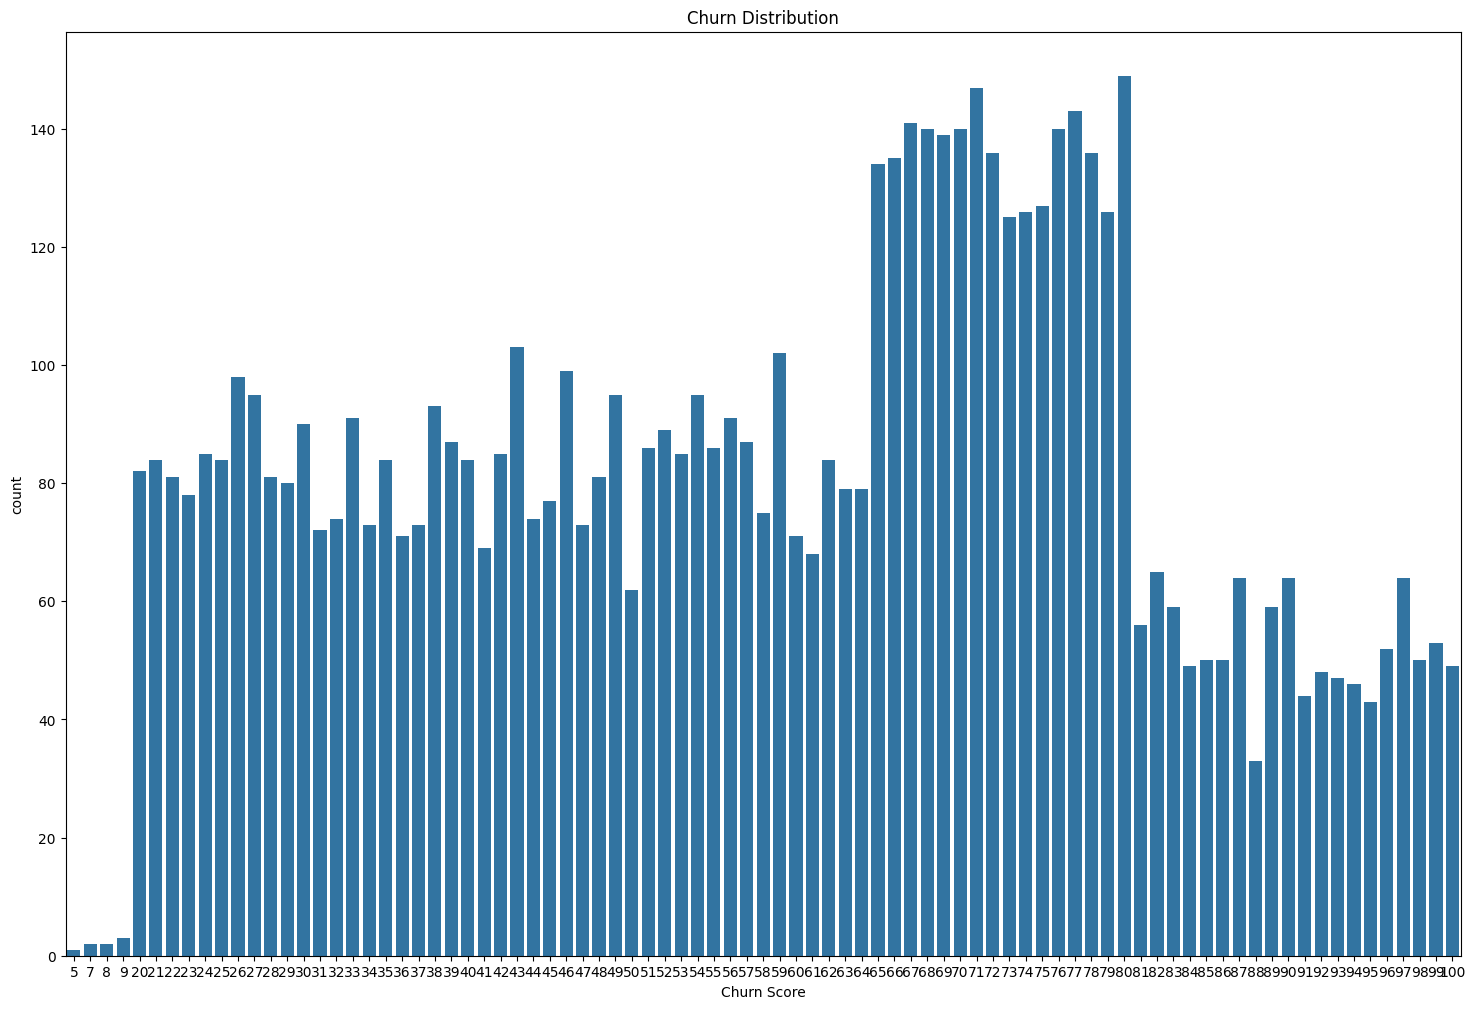

In [328]:
# Set the plot size
plt.figure(figsize=(18, 12))

# Visualize churn distribution
sns.countplot(data=telco, x='Churn Score')  # Ensure 'Churn Score' is the correct column name
plt.title("Churn Distribution")
plt.show()


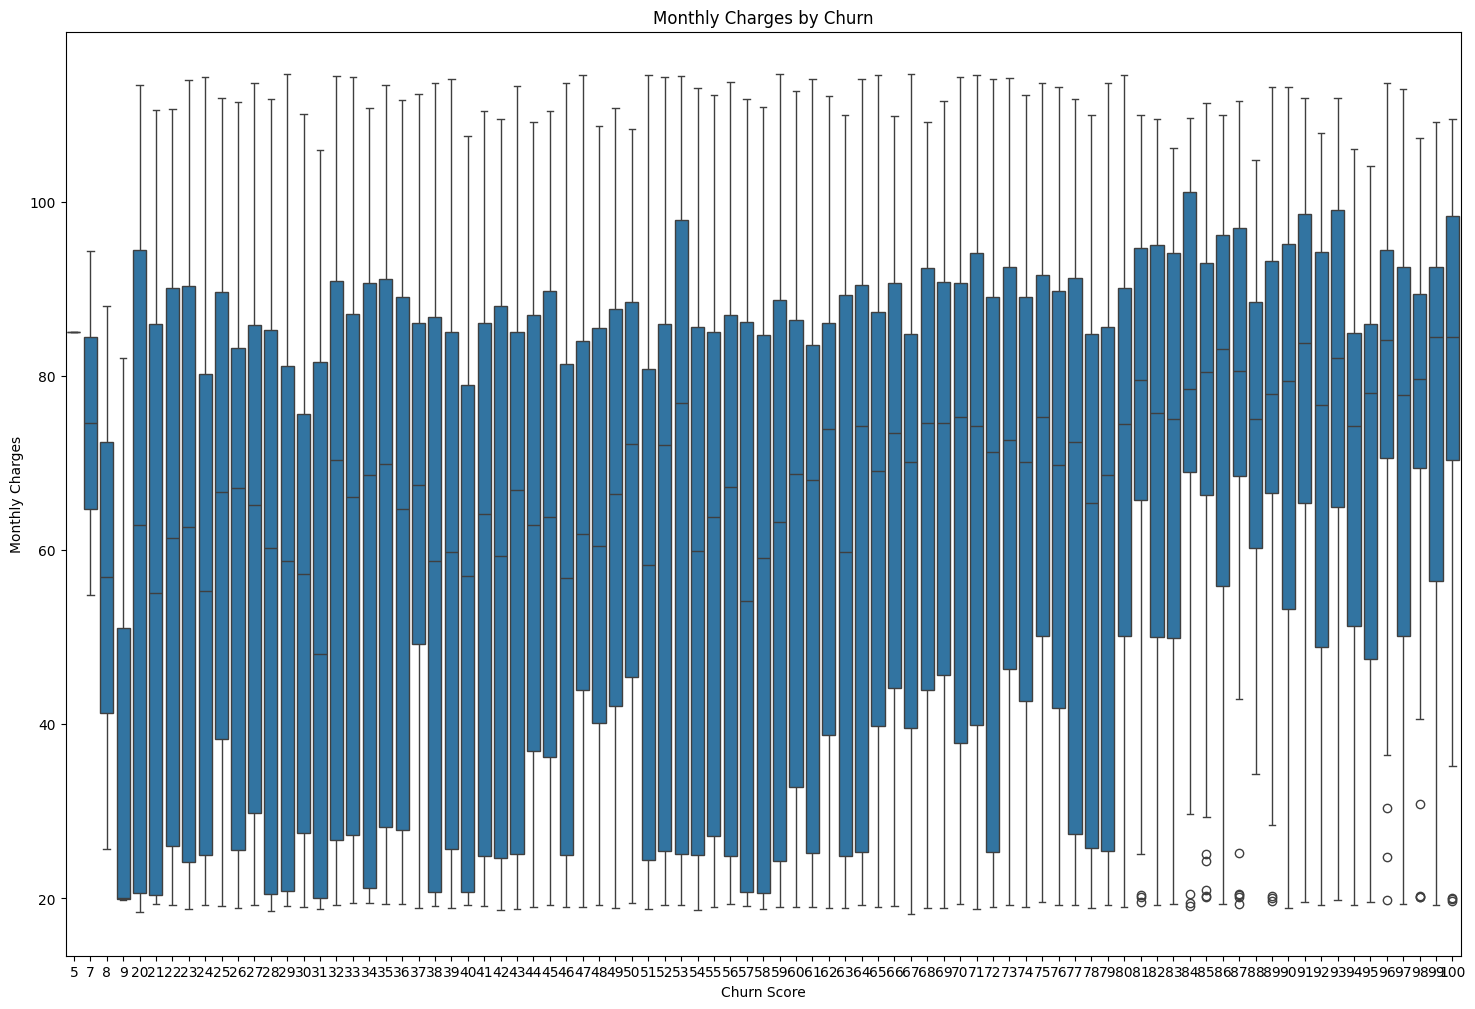

In [329]:
# Set the plot size
plt.figure(figsize=(18, 12))

# Explore relationships with key variables
sns.boxplot(data=telco, x='Churn Score', y='Monthly Charges')
plt.title("Monthly Charges by Churn")
plt.show()

Modeling

Logistic Regression

In [330]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [331]:
# Separate features and target
X = telco.drop('Churn Score', axis=1)  # Features
y = telco['Churn Score']               # Target variable


In [332]:
# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [333]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [334]:
# Train Logistic Regression model with a higher max_iter
model = LogisticRegression(max_iter=2000)  # Increased max_iter to 2000
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)

In [335]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Generate classification report with zero_division parameter
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           7       0.00      1.00      0.00         0
           8       0.00      1.00      0.00         0
           9       0.00      1.00      0.00         0
          20       0.00      0.00      0.00        28
          21       0.00      0.00      0.00        26
          22       0.05      0.10      0.07        20
          23       0.00      0.00      0.00        31
          24       0.00      0.00      0.00        34
          25       0.00      0.00      0.00        28
          26       0.04      0.03      0.04        31
          27       0.03      0.03      0.03        29
          28       0.12      0.04      0.06        25
          29       0.00      0.00      0.00        21
          30       0.00      0.00      0.00        22
          31       0.03      0.05      0.04        21
          32       0.00      0.00      0.00        23
          33       0.03      0.03      0.03        29
   

In [336]:
model = LogisticRegression(max_iter=2000, class_weight='balanced')  # Adding class weight
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000)

In [337]:
print("Class Distribution in Training Set:\n", y_train.value_counts())

Class Distribution in Training Set:
 Churn Score
66    109
80    106
76    103
68    101
70     97
     ... 
88     21
9       3
8       2
7       2
5       1
Name: count, Length: 85, dtype: int64


In [338]:
# Filter out classes with less than a specified threshold (e.g., 2 instances)
class_counts = y.value_counts()
rare_classes = class_counts[class_counts < 2].index
filtered_indices = y[~y.isin(rare_classes)].index

# Filter X and y to remove rare classes
X_filtered = X.loc[filtered_indices]
y_filtered = y.loc[filtered_indices]


In [339]:
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.3, stratify=y_filtered, random_state=42
)

# Random Forest Modelling


In [340]:
from sklearn.ensemble import RandomForestClassifier

In [341]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [342]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [343]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Generate classification report with zero_division parameter
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           7       1.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       1.00      0.00      0.00         1
          20       0.00      0.00      0.00        25
          21       0.03      0.04      0.03        25
          22       0.02      0.04      0.03        24
          23       0.00      0.00      0.00        23
          24       0.00      0.00      0.00        25
          25       0.00      0.00      0.00        25
          26       0.06      0.07      0.06        29
          27       0.02      0.03      0.03        29
          28       0.05      0.08      0.06        24
          29       0.00      0.00      0.00        24
          30       0.03      0.04      0.03        27
          31       0.00      0.00      0.00        22
          32       0.00      0.00      0.00        22
          33       0.02      0.04      0.03        27
   

# Lasso Regression


In [344]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [345]:
# Assume we are predicting 'MonthlyCharges' as a regression task
# Ensure 'MonthlyCharges' is your continuous target variable
X = telco.drop(columns=['Monthly Charges'])  # Drop the target variable
y = telco['Monthly Charges']                 # Target variable

In [346]:
# One-hot encode categorical variables (if needed)
X = pd.get_dummies(X, drop_first=True)

In [347]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [348]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [349]:
# Initialize Lasso model with alpha parameter for regularization strength
lasso = Lasso(alpha=1.0)  # Adjust alpha for stronger or weaker regularization
lasso.fit(X_train_scaled, y_train)


Lasso()

In [350]:
# Make predictions on test data
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 319.86932459129036
R-squared (R2): 0.626840467909455
